In [1]:
import numbers
from river import compose
from river import datasets
from river import evaluate
from river import linear_model
from river import metrics
from river import preprocessing
from river import tree
from river import stream
import graphviz

In [10]:
dataset = datasets.SolarFlare()
num = compose.SelectType(numbers.Number) | preprocessing.MinMaxScaler()
cat = compose.SelectType(str) | preprocessing.OneHotEncoder(sparse=False)

In [13]:
model = tree.iSOUPTreeRegressor(
    grace_period=100,
    leaf_prediction='model',
    leaf_model={
        'c-class-flares': linear_model.LinearRegression(l2=0.02),
        'm-class-flares': linear_model.PARegressor(),
        'x-class-flares': linear_model.LinearRegression(l2=0.1)
    }
)

pipeline = (num + cat) | model
metric = metrics.multioutput.MicroAverage(metrics.R2())

x = evaluate.progressive_val_score(dataset, pipeline, metric)


In [15]:
x.get()

-1.024669442889377


(dot.exe:13628): Pango-WARNING **: couldn't load font "trebuchet Not-Rotated 11", falling back to "Sans Not-Rotated 11", expect ugly output.


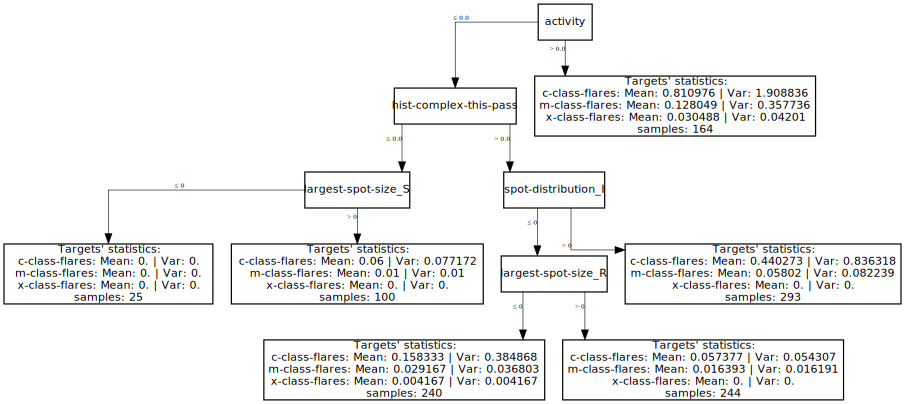

In [4]:
model.draw()

In [5]:
# demonstrate how to create a river dataset from Pandas
import pandas as pd
X = pd.DataFrame({
    'x1': [1, 2, 3, 4],
    'x2': ['blue', 'yellow', 'yellow', 'blue'],
    'y': [True, False, False, True]
})
y = X.pop('y')

for xi, yi in stream.iter_pandas(X, y):
    print(xi, yi)

{'x1': 1, 'x2': 'blue'} True
{'x1': 2, 'x2': 'yellow'} False
{'x1': 3, 'x2': 'yellow'} False
{'x1': 4, 'x2': 'blue'} True
